In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Aufgabe 1

In [14]:
Tn = np.array([5, 10, 15, 20, 25], dtype=float)
cn = np.array([333.7, 337.7, 339.4, 342.5, 346.6], dtype=float)

A = np.array([[1, T] for T in Tn], dtype=float)

b = np.linalg.pinv(A)@cn

print(f'b-koeff = {b}')

print(f"Schallgeschwindigkeit @ 20°C = {b[0] + b[1]*20:4g} m/s")

b-koeff = [330.8     0.612]
Schallgeschwindigkeit @ 20°C = 343.04 m/s


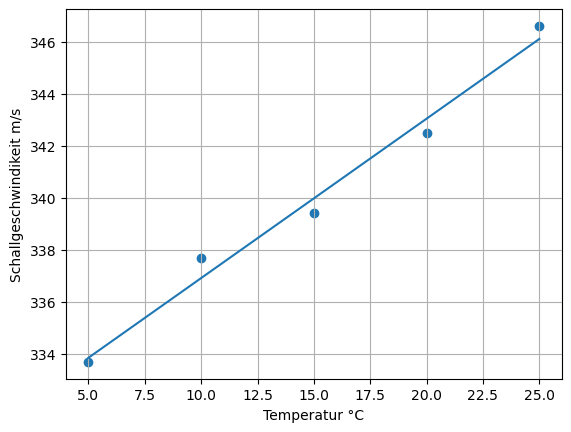

In [15]:
plt.figure()
plt.scatter(Tn, cn)

t = np.linspace(np.min(Tn), np.max(Tn), 100)
y = t*b[1] + b[0]
plt.plot(t, y)

plt.grid(True)
plt.ylabel("Schallgeschwindikeit m/s")
plt.xlabel("Temperatur °C")

plt.show()

### Aufgabe 2

In [46]:
data = pd.read_csv('SEP_Training_Data.csv')

hours = data["hoursStudiedforSEP"].values
midterm = data["midtermGrade"].values
passed = data["passed"].values
failed = np.logical_not(passed)

In [50]:
np.where(passed)

(array([ 0,  4,  6,  8,  9, 11, 12, 13, 18, 19, 21, 23, 24, 28, 30, 31, 32,
        35, 36, 37, 39], dtype=int64),)

#### Plot Training Data

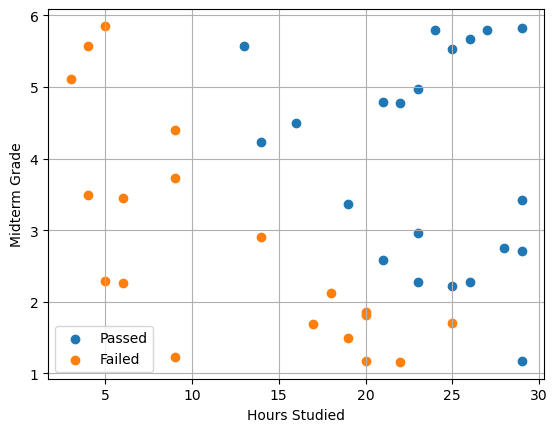

In [ ]:
plt.figure()
plt.scatter(hours[np.where(passed)], midterm[np.where(passed)], label="Passed")
plt.scatter(hours[np.where(failed)], midterm[np.where(failed)], label="Failed")

plt.xlabel("Hours Studied")
plt.ylabel("Midterm Grade")
plt.legend()
plt.grid(True)

plt.show()

#### Learning

In [101]:
w = np.array([0, 0], dtype=float)
b = 0.0
alpha = 0.1

In [102]:
dw = 0.0
db = 0.0

m = len(passed)

x = np.stack((hours, midterm), axis=1)

for _ in range(10000):
    v = x@w + b
    y_hat = 1/(1+np.exp(-v))
    dv = y_hat - passed
    dw = np.mean(np.stack((dv*x[:,0], dv*x[:,1]), axis=1), axis=0)
    db = np.mean(dv)

    w -= alpha*dw
    b -= alpha*db

print(w)
print(b)

[0.74315341 3.09591587]
-22.886916068983584


#### Testing

In [103]:
test_data = pd.read_csv('SEP_Test_Data.csv')

hours_test = test_data["hoursStudiedforSEP"].values
midterm_test = test_data["midtermGrade"].values
passed_test = test_data["passed"].values

In [104]:
x = np.stack((hours_test, midterm_test), axis=1)
v = x@w + b
y_hat = 1/(1+np.exp(-v))

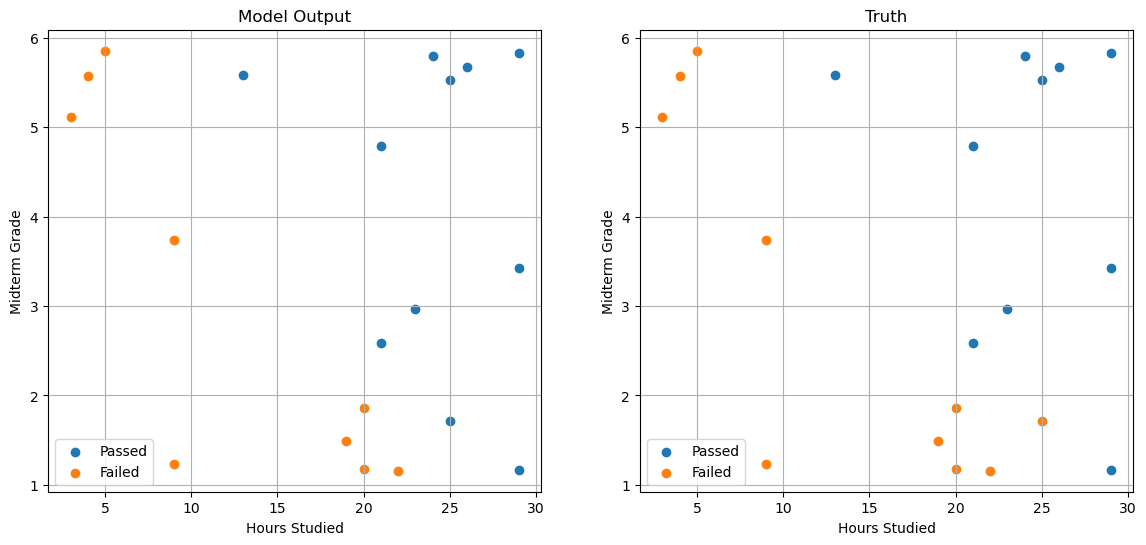

In [106]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Model Output")
plt.scatter(hours_test[np.where(y_hat >= 0.5)], midterm_test[np.where(y_hat >= 0.5)], label="Passed")
plt.scatter(hours_test[np.where(y_hat < 0.5)], midterm_test[np.where(y_hat < 0.5)], label="Failed")

plt.xlabel("Hours Studied")
plt.ylabel("Midterm Grade")
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.title("Truth")
plt.scatter(hours_test[np.where(passed_test)], midterm_test[np.where(passed_test)], label="Passed")
plt.scatter(hours_test[np.where(passed_test == 0)], midterm_test[np.where(passed_test == 0)], label="Failed")

plt.xlabel("Hours Studied")
plt.ylabel("Midterm Grade")
plt.legend()
plt.grid(True)

plt.show()